In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Checking missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

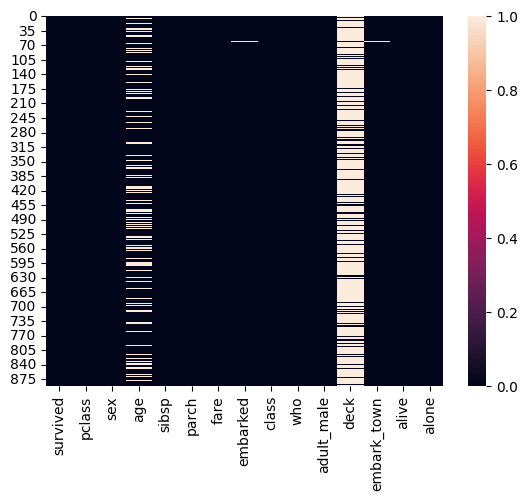

In [4]:
#Heatmap 
sns.heatmap(df.isnull())

In [5]:
#1.Deleting all the rows with NaN values.
df.dropna().shape

(182, 15)

In [6]:
#2.Handling missing values by deleting columns
df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Techniques 
# 1.Mean Imputation
* Use the mean when the variable follows a normal distribution or is approximately normally distributed.
* It is sensitive to extreme values (outliers), so if the variable has outliers, median imputation might be more appropriate.
* This Technique works well when data is Noramlly Distributed.
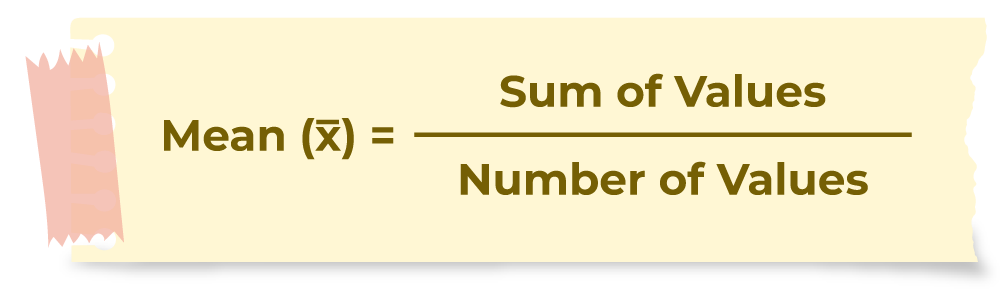

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12172\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

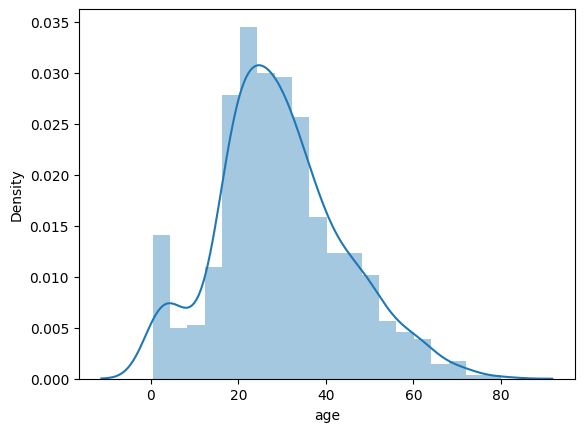

In [7]:
sns.distplot(df['age'])

In [8]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [9]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


# 2.Median Imputation 
* If you have outliers in dataset, use this technique
* Use the median when the variable is not normally distributed or has outliers.
* Median is a robust measure of central tendency, meaning it is less affected by extreme values compared to the mean.
* It is suitable for variables with skewed distributions.
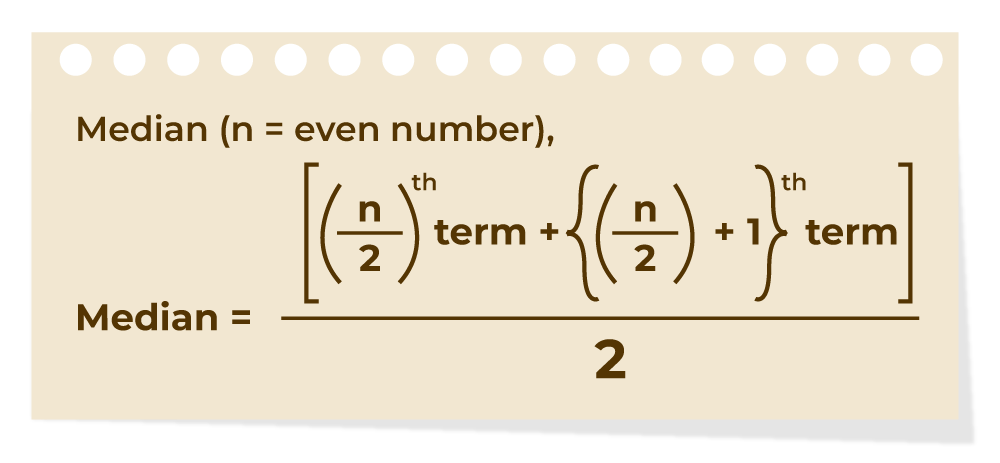

In [10]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [11]:
df[['Age_mean','Age_median','age']]

,Age_mean,Age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


# 3.Mode Value Imputation
* Specifically used for categorical features.
* Mode is used when dealing with categorical data or discrete variables.
* It is suitable for imputing missing values in variables with a finite set of categories.
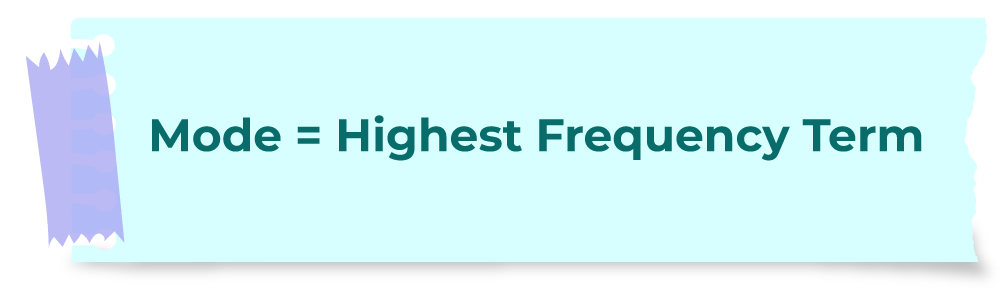


In [12]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [13]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
mode = df[df['age'].notna()]['embarked'].mode()[0]
mode

'S'

In [15]:
df['embarked_mode'] = df['embarked'].fillna(mode)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [16]:
df.embarked_mode.isnull().sum()

0